# Import the relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.cluster import KMeans

# Load the dataset

Dataset: https://bit.ly/3kXTdox

In [2]:
data = pd.read_csv("C:/Users/Aditi Saini/Downloads/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Check for null values and outliers

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# K-means Clustering

In [6]:
x = data.iloc[:,1:5]

To find optimal no. of clusters we'll use The Elbow Method.

In [7]:
wcss= [] #with-in cluster sum of square

for i in range (1,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [8]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34492380952378,
 46.535582051282034,
 38.95373036498037,
 34.1967910993998,
 30.02881887717758,
 28.22959330143542,
 26.138882478632485]

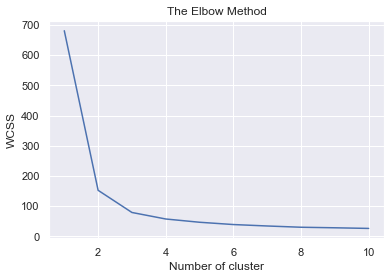

In [9]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

We can see a lower elbow at 3, after that wcss doesn't decrease significantly with every iteration.                              So, we'll form 3 clusters.

Before forming the clusters, we have to choose a seed and KMeans uses k-means++ method to do that.

In [10]:
kmeans = KMeans(3)
kmeans.fit(x)
y_kmeans = kmeans.fit_predict(x)

# Visualizing the Clusters 

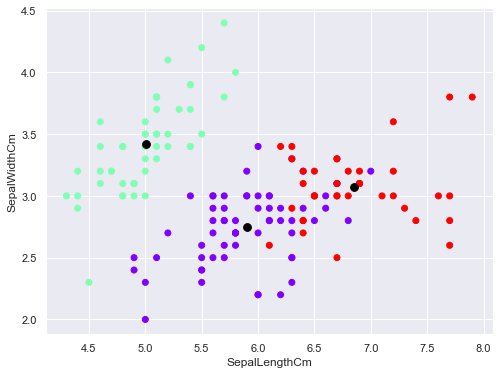

In [11]:
# Visualizing clusters on the basis of Sepal length and Sepal width
plt.figure(figsize=(8,6))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=y_kmeans, cmap='rainbow')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=60);

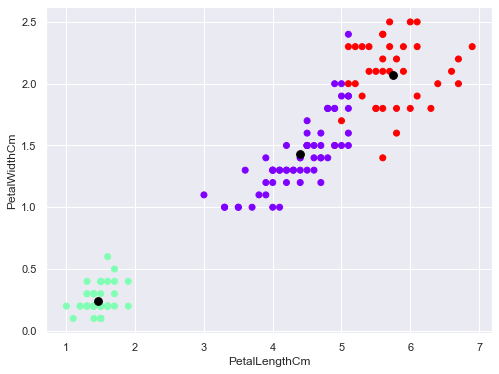

In [12]:
# Visualizing clusters on the basis of petal length and petal width
plt.figure(figsize=(8,6))
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=y_kmeans, cmap='rainbow')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=60);